# Course name: Programming in Python
## Assignment 1: A statistical analysis of the given dataset about abalones.
## Author: Artur Szewczykowski 252546

Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load data and map sexs

In [2]:
column_names = [
    'Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 
    'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'
    ]
data1 = pd.read_csv('data.csv', delimiter=",", header=None, names=column_names)
Sex_map = {'M': 'Male', 'I': 'Infant', 'F': 'Female'}
data1['Sex'] = data1['Sex'].map(Sex_map)
quantitative_data = data1.select_dtypes(include="number")
quantitative_columns = list(quantitative_data.columns)

1. Distribution of the qualitative variable.

In [3]:
sex_counts = data1['Sex'].value_counts()
df1 = pd.DataFrame({
    '': sex_counts.index,
    'count': sex_counts.values
})
df1['%'] = (df1['count'] / df1['count'].sum() * 100)

df1 = df1.style.hide(axis="index") \
                      .set_properties(**{'text-align': 'left'}) \
                      .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]) \
                      .format({'%': '{:.2f}'})  

display(df1)

,count,%
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


2. Statistics for the quantitative variables.

In [4]:
stats = {
    'mean': data1[quantitative_columns].mean(),
    'std': data1[quantitative_columns].std(),
    'min': data1[quantitative_columns].min(),
    '25%': data1[quantitative_columns].quantile(0.25),
    '50%': data1[quantitative_columns].median(),
    '75%': data1[quantitative_columns].quantile(0.75),
    'max': data1[quantitative_columns].max()
}

df2 = pd.DataFrame(stats, index=quantitative_columns)

df2_styled = df2.style.set_properties(**{'text-align': 'center'}) \
                      .set_table_styles([
                          {'selector': 'th.row_heading', 'props': [('text-align', 'left')]}
                      ]) \
                      .format(precision=2)

display(df2_styled)

,mean,std,min,25%,50%,75%,max
Length,0.52,0.12,0.07,0.45,0.55,0.61,0.81
Diameter,0.41,0.10,0.06,0.35,0.42,0.48,0.65
Height,0.14,0.04,0.00,0.12,0.14,0.17,1.13
Whole weight,0.83,0.49,0.00,0.44,0.80,1.15,2.83
Shucked weight,0.36,0.22,0.00,0.19,0.34,0.50,1.49
Viscera weight,0.18,0.11,0.00,0.09,0.17,0.25,0.76
Shell weight,0.24,0.14,0.00,0.13,0.23,0.33,1.00
Rings,9.93,3.22,1.00,8.00,9.00,11.00,29.00


3. Bar charts of the counts of occurrences of each category for the qualitative variable.

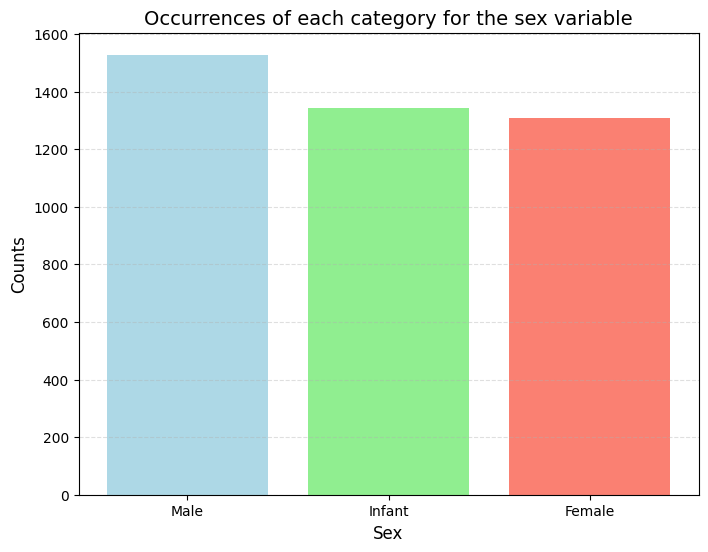

In [5]:
plt.figure(figsize=(8, 6))
plt.bar(sex_counts.index, sex_counts.values, color=['lightblue', 'lightgreen', 'salmon'])

plt.title('Occurrences of each category for the sex variable', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4) 

plt.show()

4. Histograms of each quantitative variable.

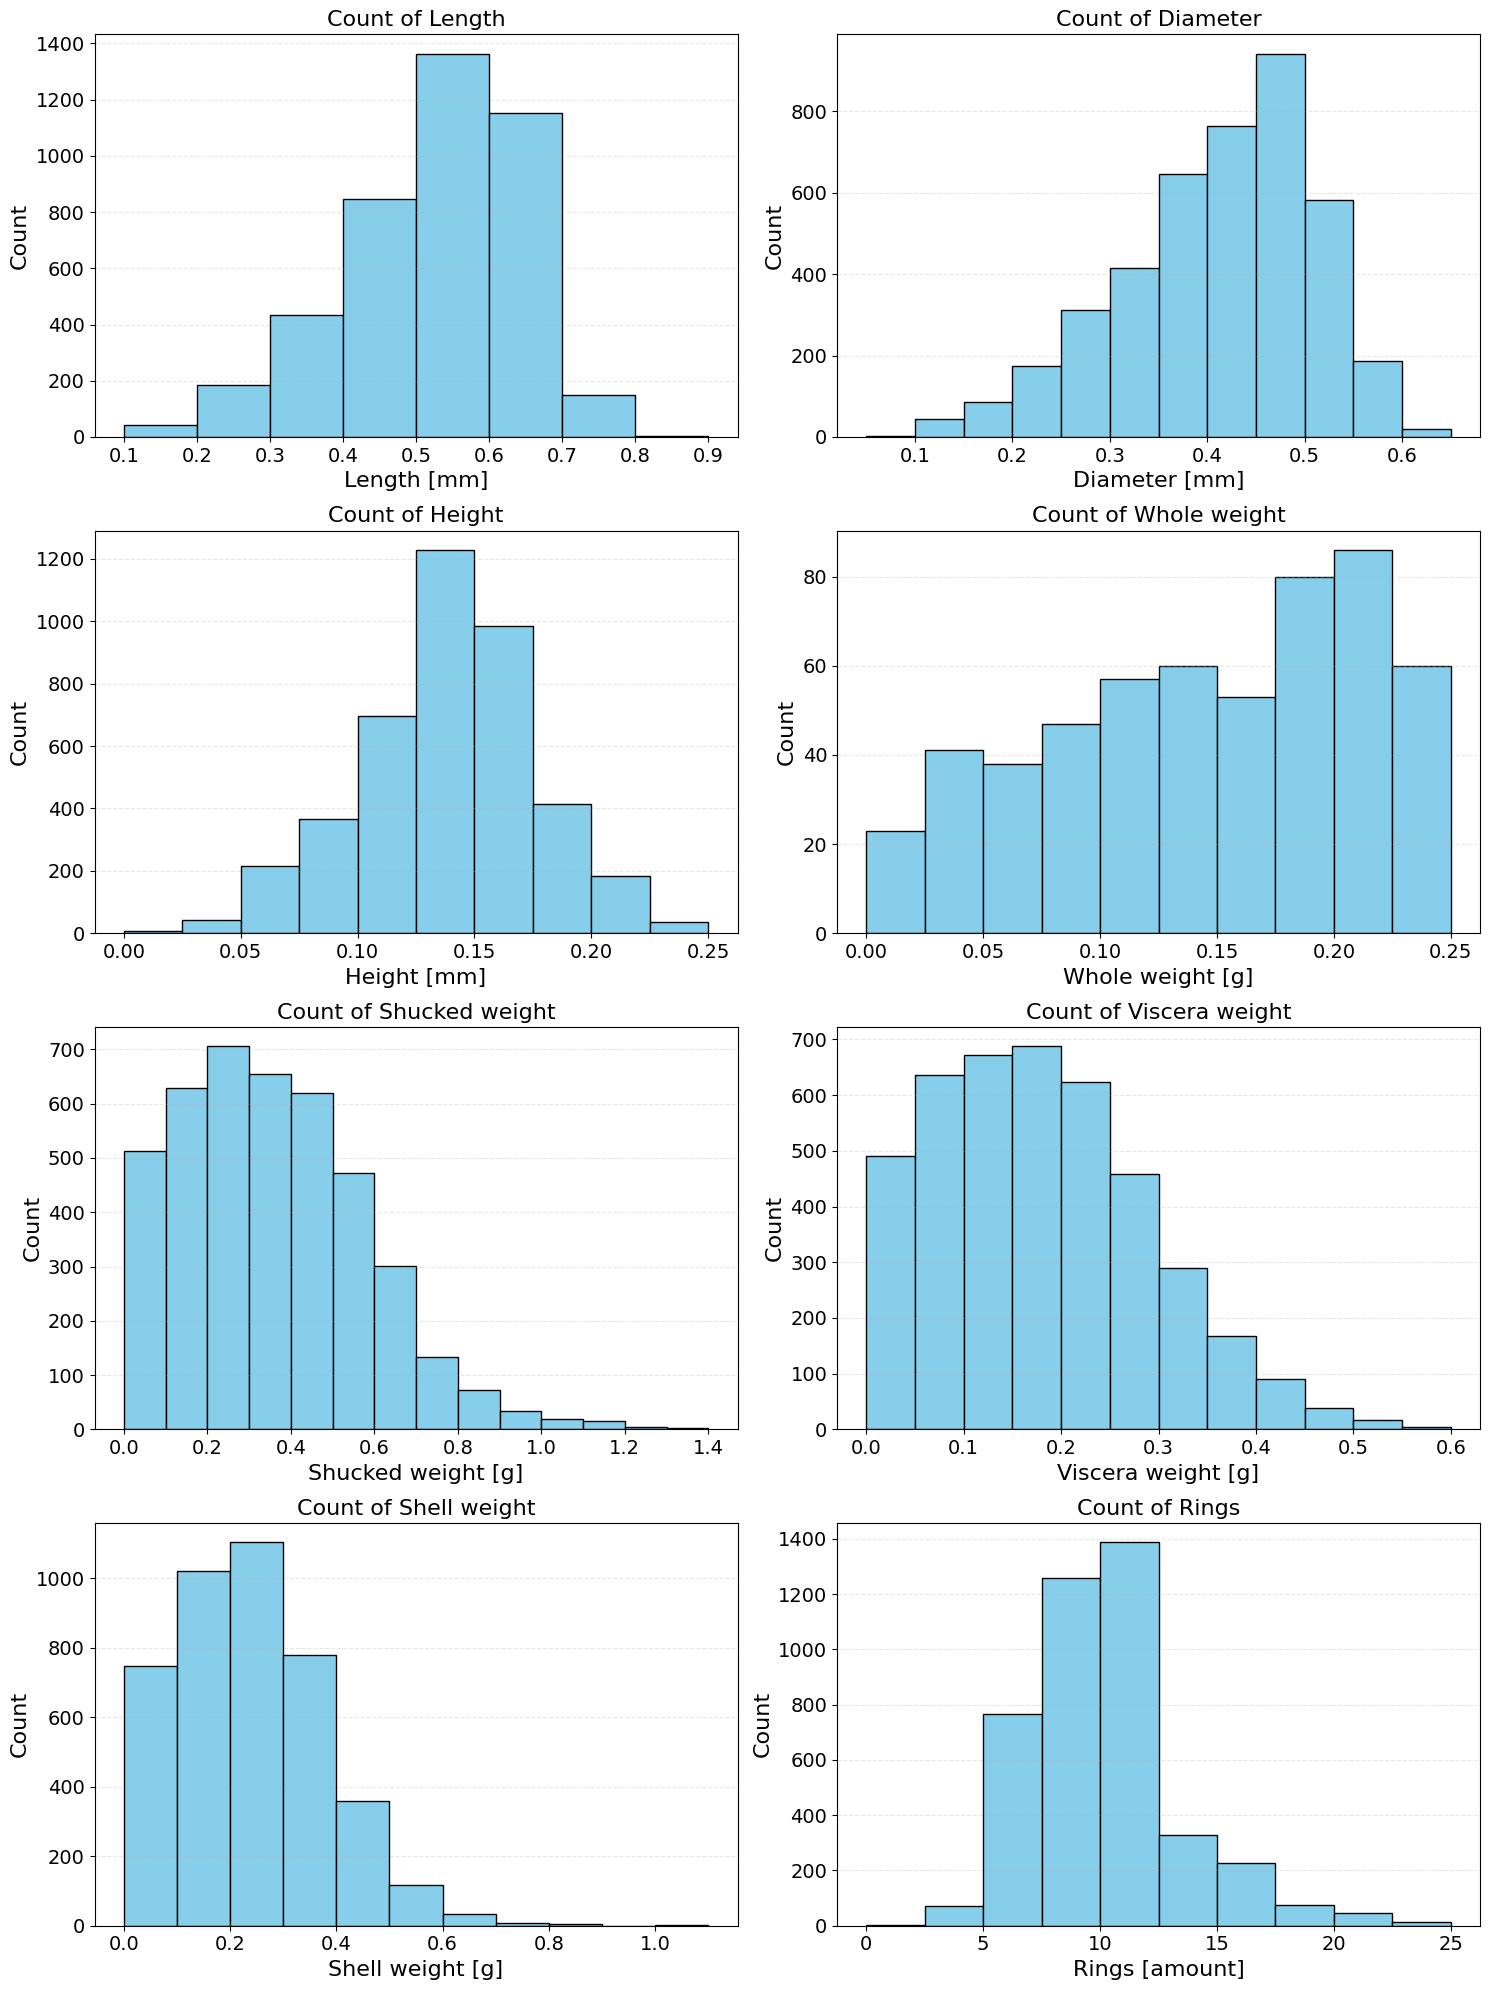

In [6]:
bins_params = {
    0: (0.1, 0.9, 8),
    1: (0.05, 0.65, 12),
    2: (0, 0.25, 10),
    3: (0, 0.25, 10),
    4: (0, 1.4, 14),
    5: (0, 0.6, 12),
    6: (0, 1.1, 11),
    7: (0, 25, 10)
}
    
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel() 
    
for i, quantitative_var in enumerate(quantitative_data):
    a, b, c = bins_params.get(i)
    axes[i].hist(data1[quantitative_var], range=(a, b), bins=c, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Count of {quantitative_var}', fontsize=16)
    unit = '[mm]' if i < 3 else '[g]' if i < 7 else '[amount]'
    axes[i].set_xlabel(f'{quantitative_var} {unit}', fontsize=16)
    axes[i].set_ylabel('Count', fontsize=16)
    axes[i].tick_params(axis='x', labelsize=14)
    axes[i].tick_params(axis='y', labelsize=14)
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

5. Scatter plots for each pair of the quantitative variables.

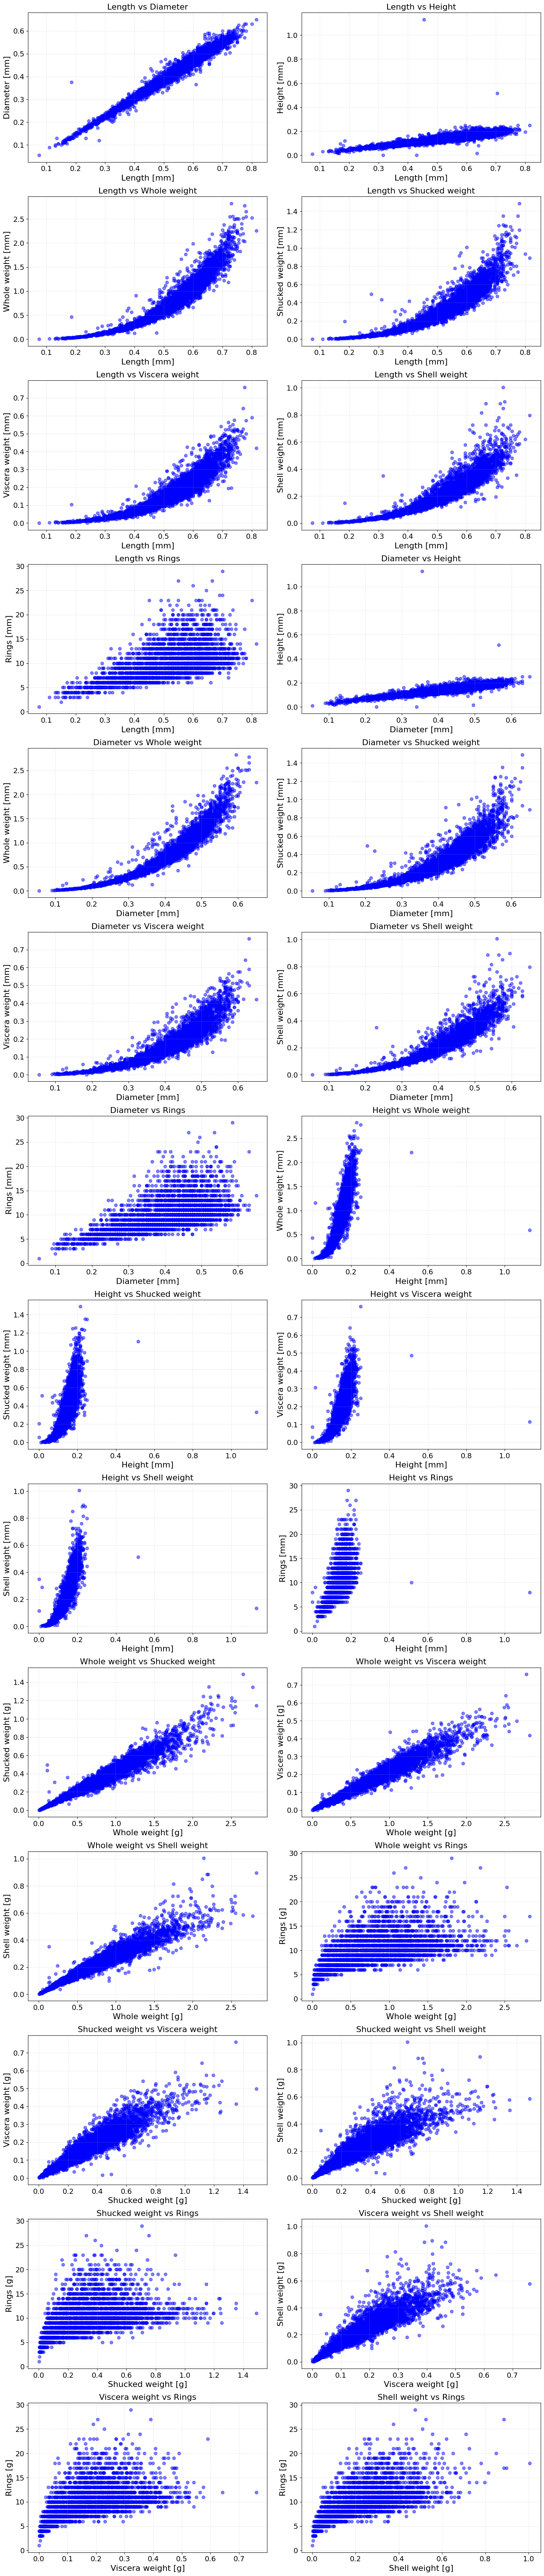

In [7]:
fig, axes = plt.subplots(14, 2, figsize=(15, 70))
axes = axes.ravel()
plot_idx = 0
for i, x_var in enumerate(quantitative_columns):
    for j in range(i+1, len(quantitative_columns)):
        y_var = quantitative_columns[j]
        axes[plot_idx].scatter(data1[x_var], data1[y_var], alpha=0.5, color='blue')
        axes[plot_idx].set_title(f'{x_var} vs {y_var}', fontsize=16)
        
        unit = '[mm]' if i < 3 else '[g]' if i < 7 else '[amount]'
        axes[plot_idx].set_xlabel(f'{x_var} {unit}', fontsize=16)
        axes[plot_idx].set_ylabel(f'{y_var} {unit}', fontsize=16)
        
        axes[plot_idx].tick_params(axis='x', labelsize=14)
        axes[plot_idx].tick_params(axis='y', labelsize=14)
        axes[plot_idx].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.5)
        plot_idx += 1
        
plt.tight_layout()
plt.show()

6. Table representing a linear correlation matrix of all quantitative variables.

In [8]:
correlation_matrix = quantitative_data.corr()
correlation_matrix_styled = correlation_matrix.style.set_properties(**{'text-align': 'center'}) \
                      .set_table_styles([
                          {'selector': 'th', 'props': [('text-align', 'center')]},
                          {'selector': 'th.row_heading', 'props': [('text-align', 'left')]}]) \
                      .format(precision=2)

display(correlation_matrix_styled)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.00,0.99,0.83,0.93,0.90,0.90,0.90,0.56
Diameter,0.99,1.00,0.83,0.93,0.89,0.90,0.91,0.57
Height,0.83,0.83,1.00,0.82,0.77,0.80,0.82,0.56
Whole weight,0.93,0.93,0.82,1.00,0.97,0.97,0.96,0.54
Shucked weight,0.90,0.89,0.77,0.97,1.00,0.93,0.88,0.42
Viscera weight,0.90,0.90,0.80,0.97,0.93,1.00,0.91,0.50
Shell weight,0.90,0.91,0.82,0.96,0.88,0.91,1.00,0.63
Rings,0.56,0.57,0.56,0.54,0.42,0.50,0.63,1.00


7. Heatmap representing a linear correlation matrix of all quantitative variables.

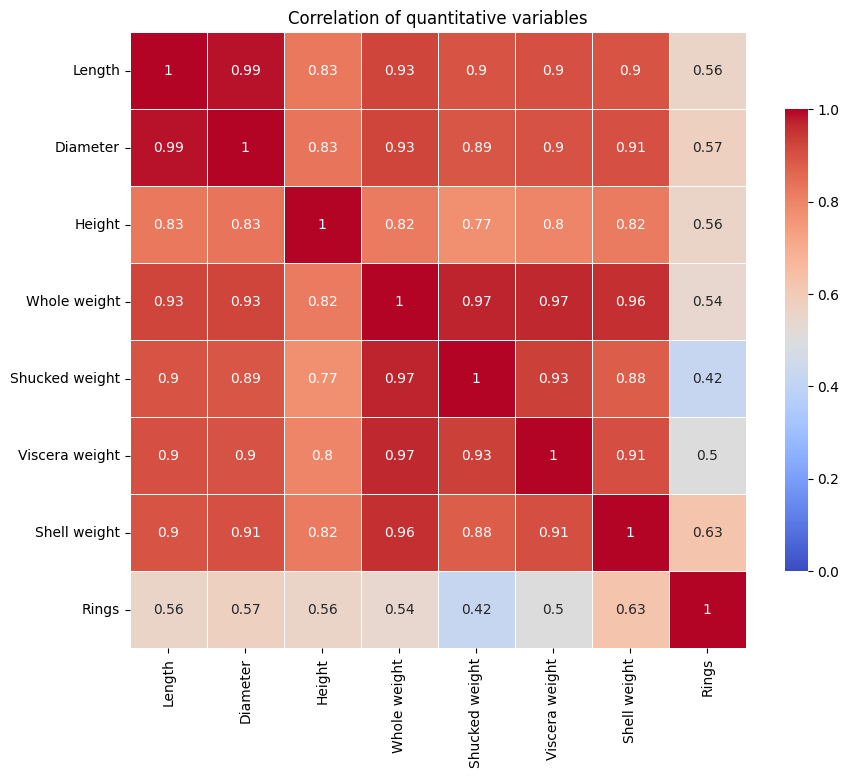

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1, square=True,
               linewidths=0.5, cbar_kws={"shrink": .75})
plt.title("Correlation of quantitative variables")
plt.show()

8. Linear regression plot with the two quantitative variables that are most strongly linearly correlated.

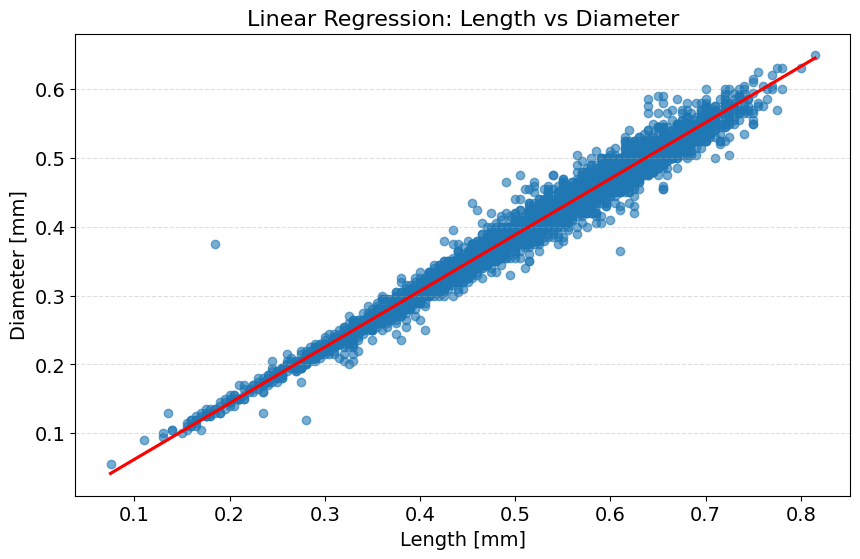

In [10]:
plt.figure(figsize=(10, 6))
x_var, y_var = quantitative_columns[:2]
sns.regplot(x=data1[x_var], y=data1[y_var], scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title(f'Linear Regression: {x_var} vs {y_var}', fontsize=16)
plt.xlabel(f'{x_var} [mm]', fontsize=14)
plt.ylabel(f'{y_var} [mm]', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4) 
plt.show()

9. Table with summary statistics for the quantitative variables in the dataset split by the categories of the qualitative variable

In [11]:
summary_list = []
for q_var in quantitative_columns:
    grouped_data = data1.groupby('Sex')[q_var]
    
    for gender, values in grouped_data:
        summary = [
            q_var, gender,
            values.mean(), values.std(), values.min(), 
            values.quantile(0.25), values.median(), 
            values.quantile(0.75), values.max()
        ]
        summary_list.append(summary)

index = pd.MultiIndex.from_tuples(
    [(feature, gender) for feature, gender, *_ in summary_list], 
    names=["Feature", "Sex"]
)

df3 = pd.DataFrame(
    [row[2:] for row in summary_list], 
    index=index,
    columns=["mean", "std", "min", "25%", "50%", "75%", "max"]
)

df3_styled = df3.style.set_properties(**{'text-align': 'center'}) \
                      .set_table_styles([
                          {'selector': 'th', 'props': [('text-align', 'center')]},
                          {'selector': 'th.index_name', 'props': [('text-align', 'left')]},
                          {'selector': 'th.row_heading', 'props': [('text-align', 'left'), ('vertical-align', 'top')]},
                      ]) \
                      .format(precision=2)

display(df3_styled)

10. Boxplot of each quantitative variable in the dataset, grouping every one of them by the qualitative variable

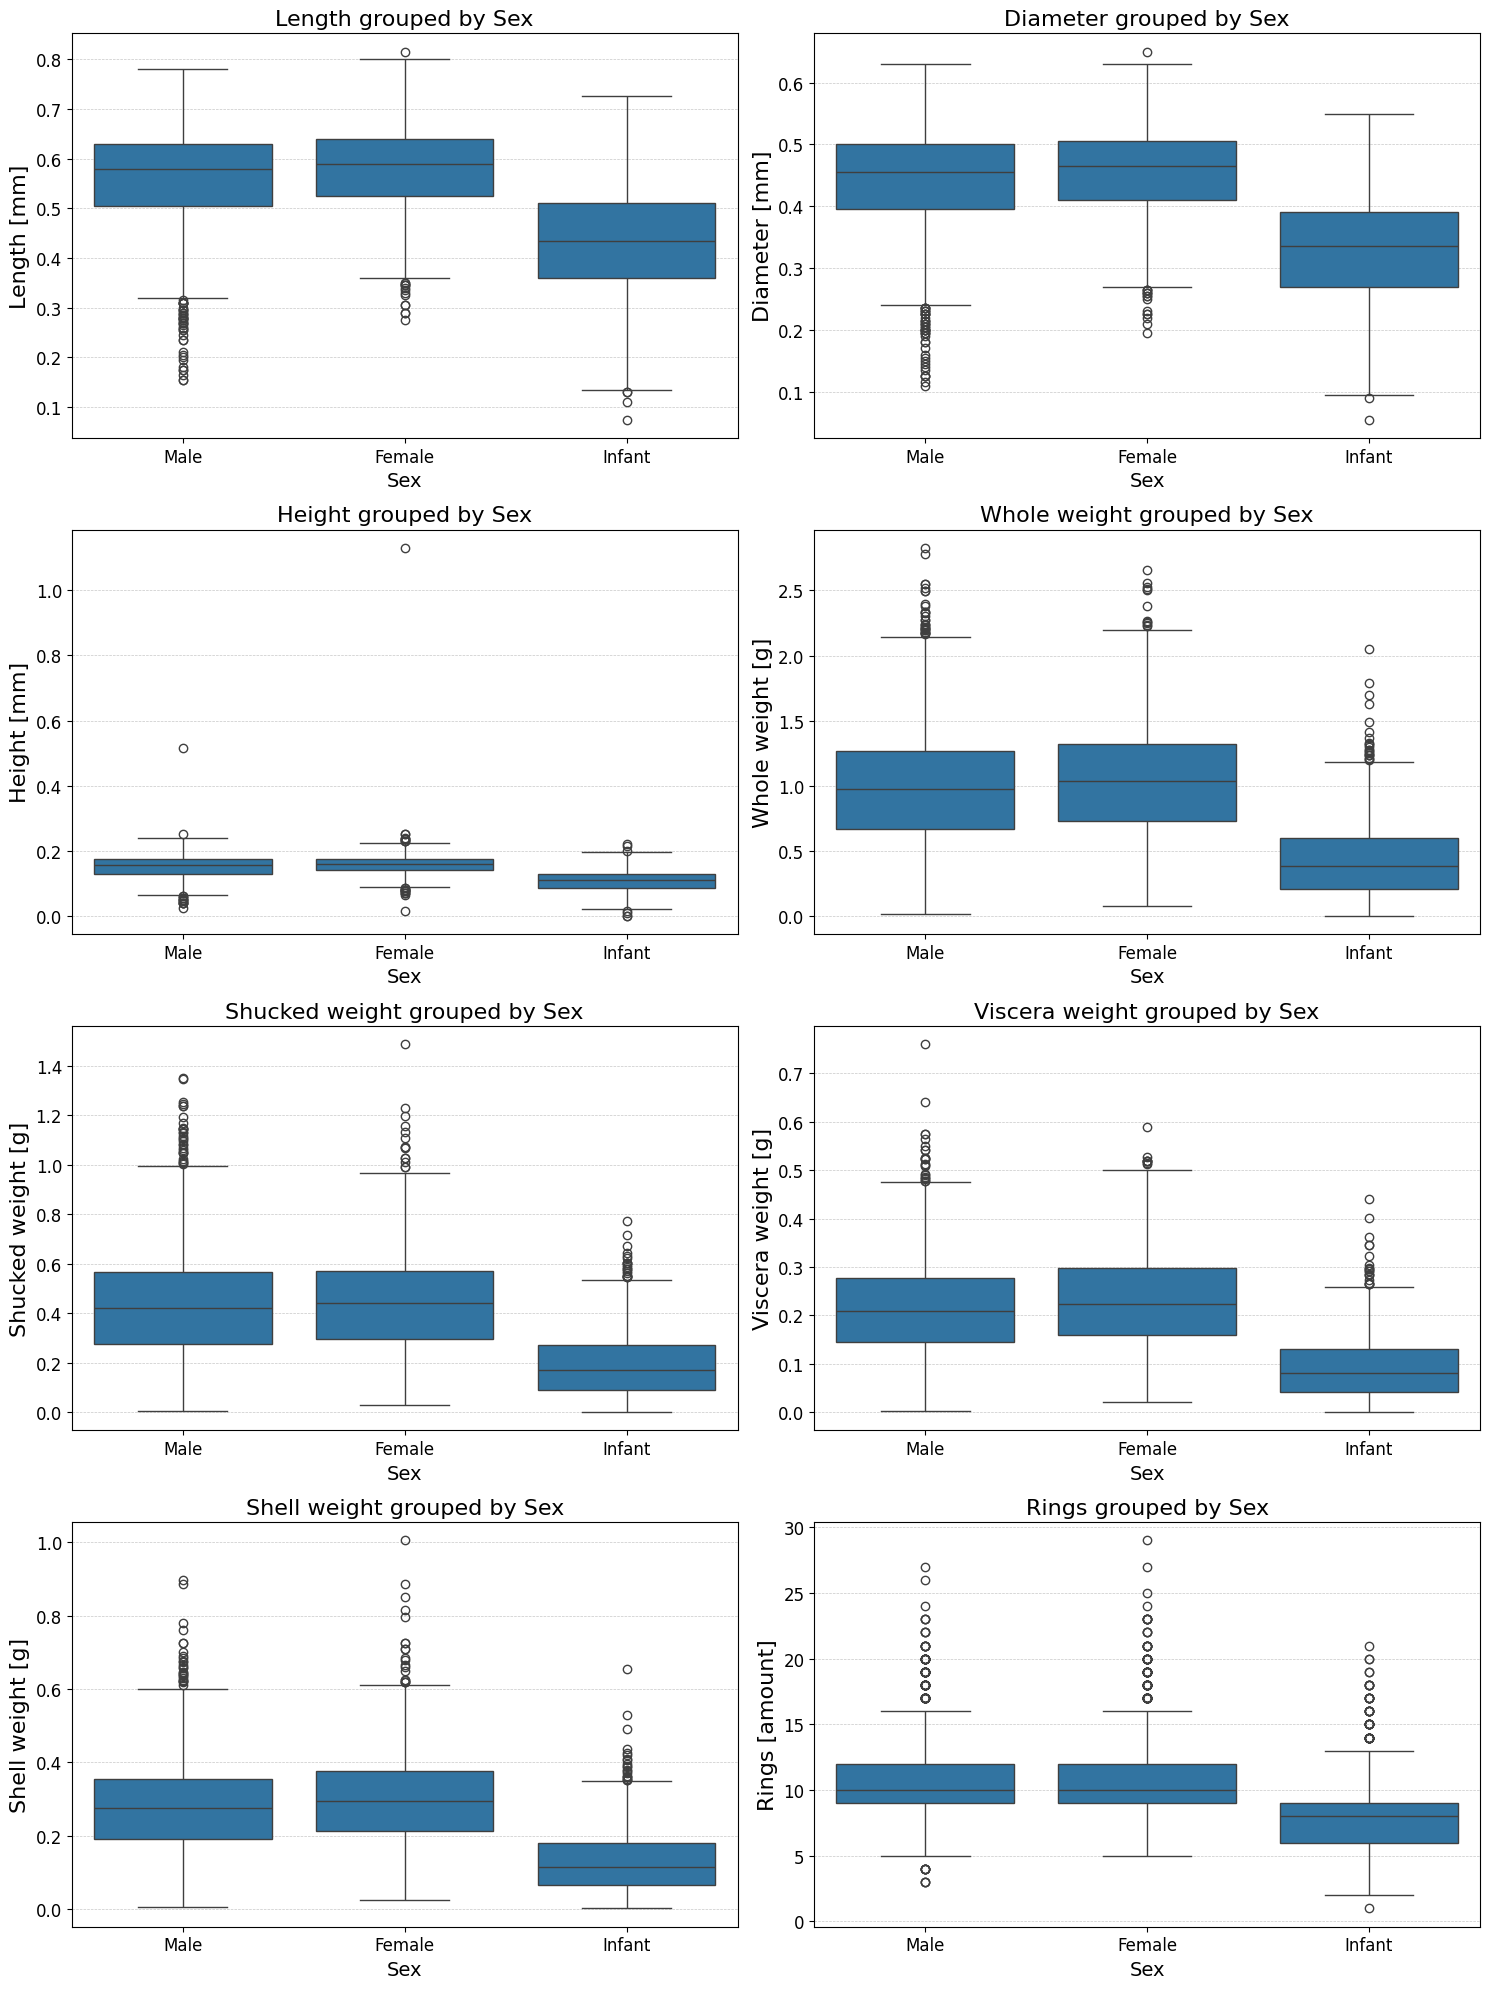

In [12]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel() 
    
for i, q_var in enumerate(quantitative_columns):
    sns.boxplot(data=data1, x='Sex', y=q_var, ax=axes[i])
    axes[i].set_title(f'{q_var} grouped by Sex', fontsize=16)
    axes[i].set_xlabel('Sex', fontsize=14)
    unit = '[mm]' if i < 3 else '[g]' if i < 7 else '[amount]'
    axes[i].set_ylabel(f'{q_var} {unit}', fontsize=16)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
    
plt.tight_layout()
plt.show()